In [1]:
import june_gloom
june_gloom.init()
june_gloom.weather_data_features()
from june_gloom import (combined_weather_df, pt_june_gloom_df, fog_days_df, rain_days_df, 
                        month_list, pt_temp_df, min_max_temp_df, pt_fog_by_month, year_min, 
                        year_max)

/home/samco/_ds/june-gloom-analysis/june_gloom.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  min_max_temp_df['month day'] = min_max_temp_df['date'].apply(lambda date:


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians

In [26]:
# Need 1997 - 1999 meanwindspdm data
combined_weather_df[combined_weather_df['year']==2000]['meanwindspdm'].value_counts()

10.0    66
8.0     54
11.0    48
6.0     33
13.0    30
5.0     25
3.0     17
14.0    14
9.0     13
19.0     7
7.0      6
12.0     5
16.0     4
18.0     3
17.0     2
2.0      2
29.0     1
27.0     1
20.0     1
15.0     1
26.0     1
23.0     1
Name: meanwindspdm, dtype: int64

In [3]:
print(combined_weather_df['year'].unique())
print('\n\n')
print(combined_weather_df['year'].value_counts())
print('\n\n')
print(fog_days_df.info())
print('\n\n')
print(rain_days_df.info())

[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007]



2004    366
2000    366
2005    365
2003    365
1999    365
1997    365
2006    365
2002    365
1998    365
2007    364
2001    362
Name: year, dtype: int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
month            189 non-null int64
year             189 non-null int64
meanwdird        189 non-null int64
meantempm        189 non-null float64
meandewptm       189 non-null float64
meanpressurem    189 non-null float64
fog              189 non-null int64
dtypes: float64(3), int64(4)
memory usage: 10.4 KB
None



<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 1 to 12
Data columns (total 5 columns):
year             367 non-null int64
meanwdird        367 non-null int64
meantempm        363 non-null float64
meandewptm       363 non-null float64
meanpressurem    367 non-null float64
dtypes: float64(3), int64(2)
memory usage: 17.2 KB
None


# value distribution

Text(0.5,1,'Distribution of Mean Wind Bearing by Day 1997 - 2007')

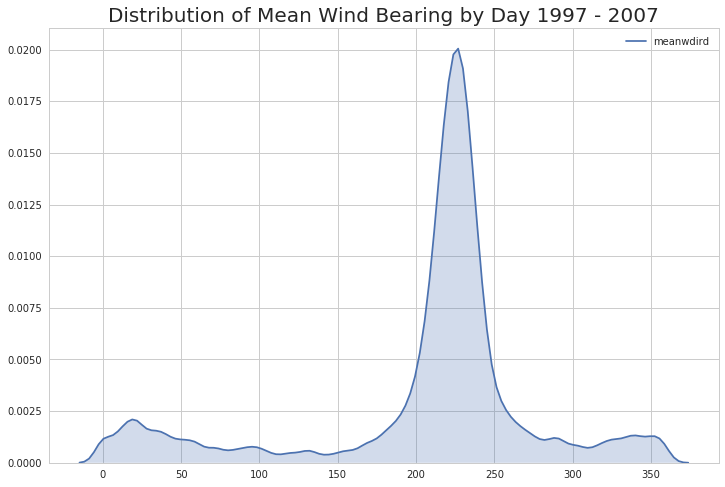

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))

sns.kdeplot(combined_weather_df['meanwdird'], shade=True)

plt.title("Distribution of Mean Wind Bearing by Day {} - {}".format(year_min, year_max), 
          fontsize=20)

In [5]:
fog_days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
month            189 non-null int64
year             189 non-null int64
meanwdird        189 non-null int64
meantempm        189 non-null float64
meandewptm       189 non-null float64
meanpressurem    189 non-null float64
fog              189 non-null int64
dtypes: float64(3), int64(4)
memory usage: 10.4 KB


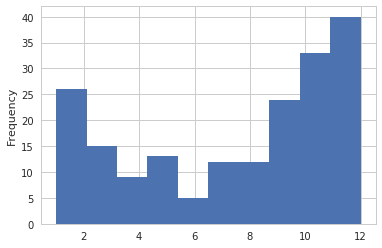

In [6]:
sns.set(style='whitegrid')

fog_days_df['month'].plot.hist()

Text(0.5,1.05,'Mean Wind Bearing vs Mean Windspeed')

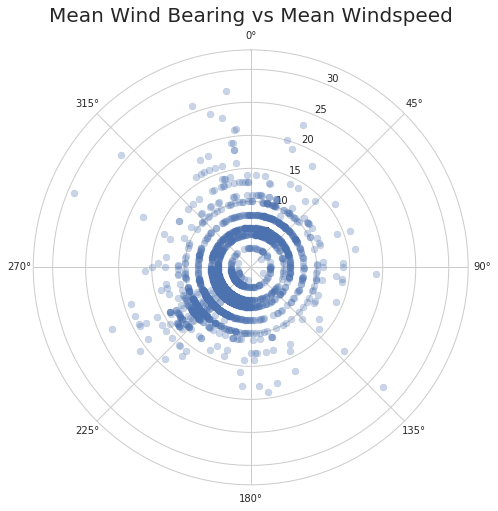

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df['meanwdird'].values], 
           y=combined_weather_df['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing vs Mean Windspeed', fontsize=20)

Text(0.5,1.05,'Mean Wind Bearing vs Mean Windspeed: Foggy condtions')

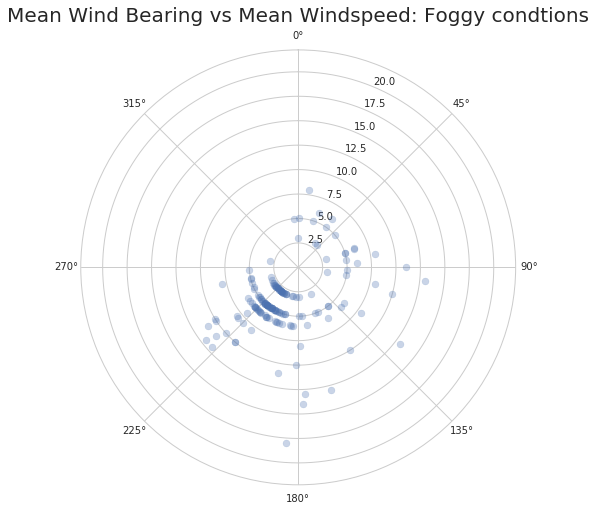

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df[combined_weather_df['fog']==1]['meanwdird'].values], 
           y=combined_weather_df[combined_weather_df['fog']==1]['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing vs Mean Windspeed: Foggy condtions', fontsize=20)

Text(0.5,1.05,'Mean Wind Bearing vs Mean Windspeed: Rainy condtions')

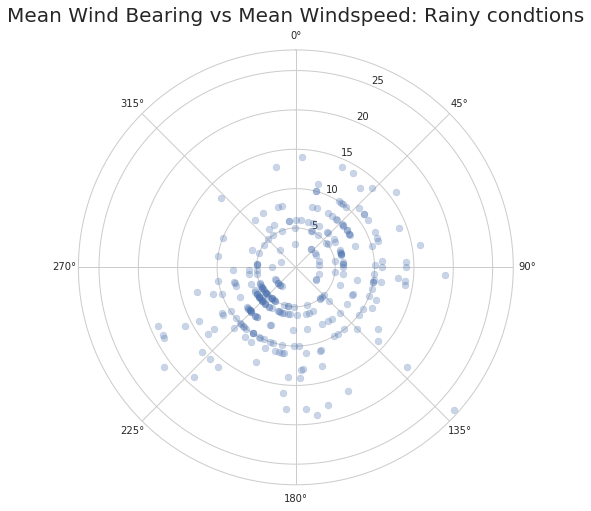

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df[combined_weather_df['rain']==1]['meanwdird'].values], 
           y=combined_weather_df[combined_weather_df['rain']==1]['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing vs Mean Windspeed: Rainy condtions', fontsize=20)

Text(0.5,1.05,'Mean Wind Dir vs Mean Dew Temp')

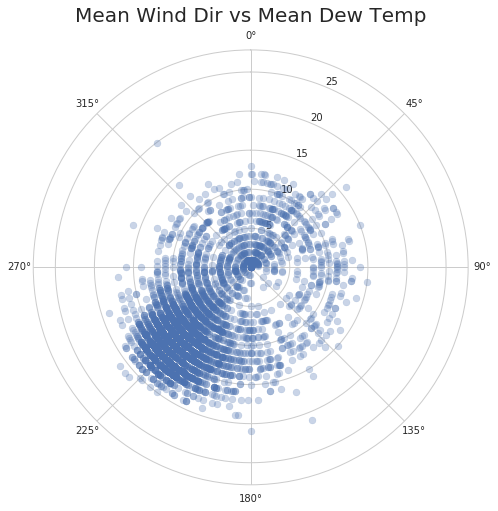

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df['meanwdird'].values], 
           y=combined_weather_df['meandewptm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Dir vs Mean Dew Temp', fontsize=20)

Text(0.5,1,'Days of Precipation over 0.25mm (Trace)')

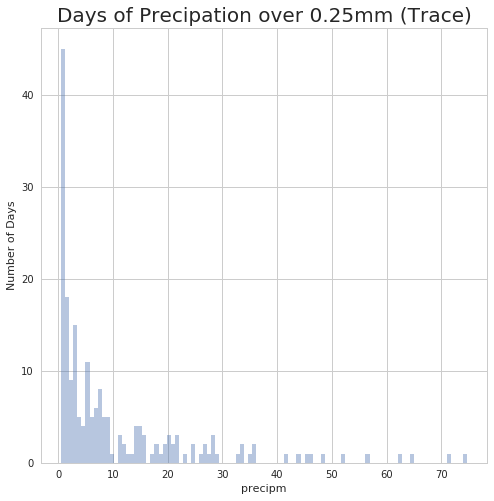

In [11]:
plt.figure(figsize=(8,8))

sns.distplot(combined_weather_df[combined_weather_df['precipm'] > 0.25]['precipm'], 
             bins=100, kde=False)

plt.ylabel("Number of Days")
plt.title("Days of Precipation over 0.25mm (Trace)", fontsize=20)

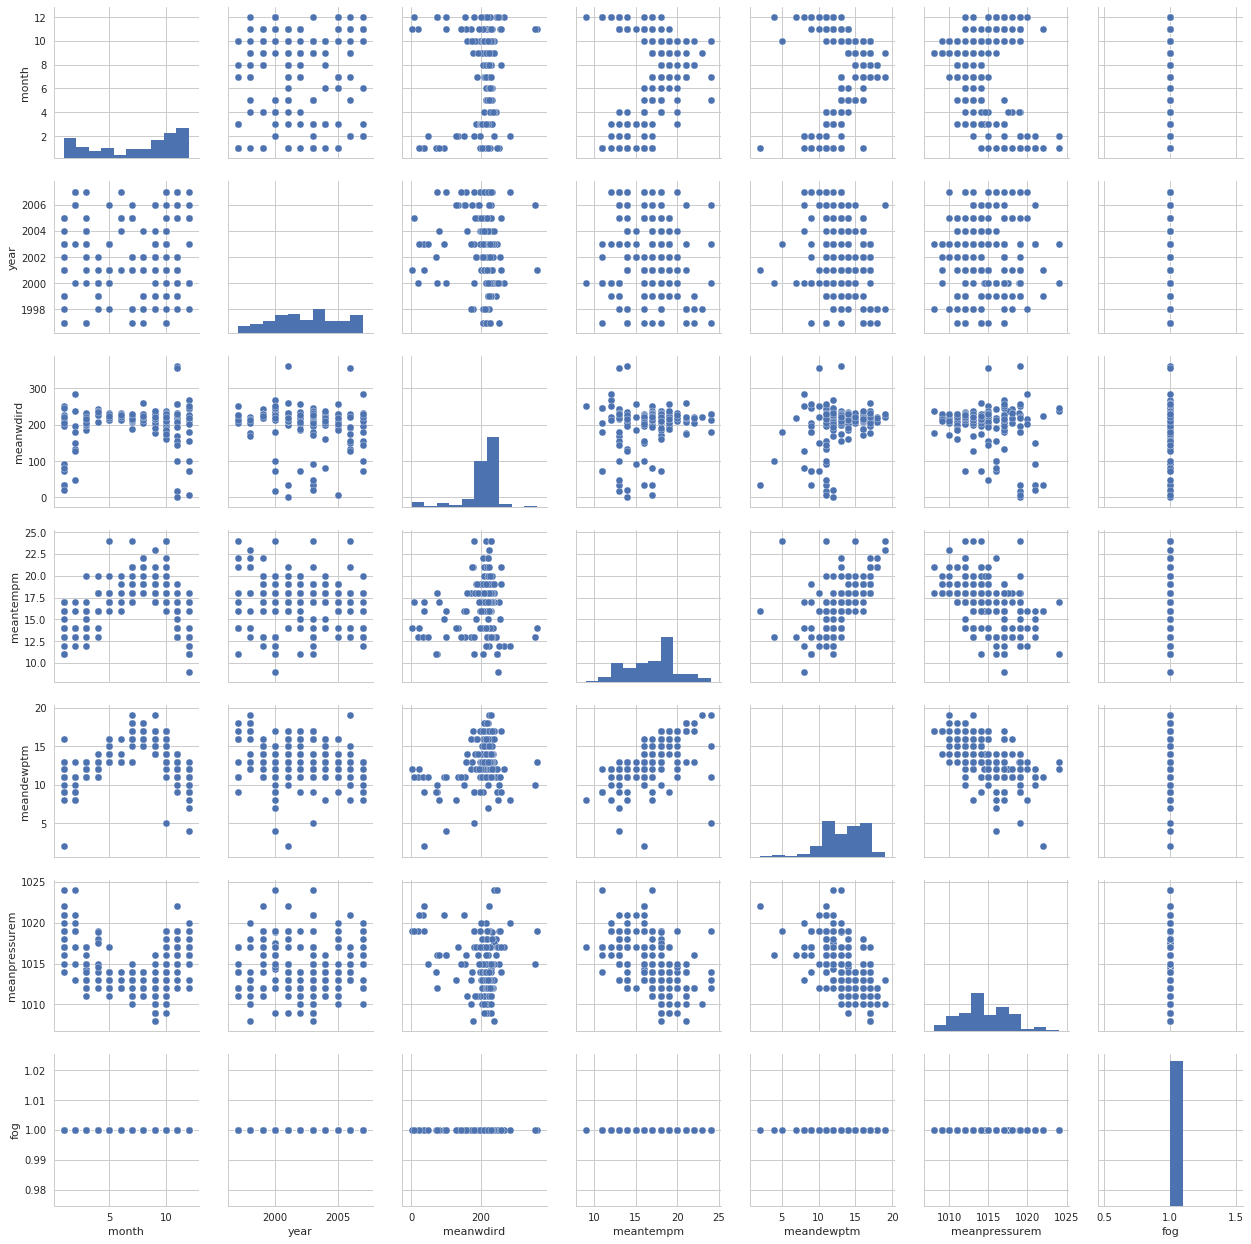

In [12]:
sns.set(style='whitegrid')

sns.pairplot(fog_days_df.dropna())

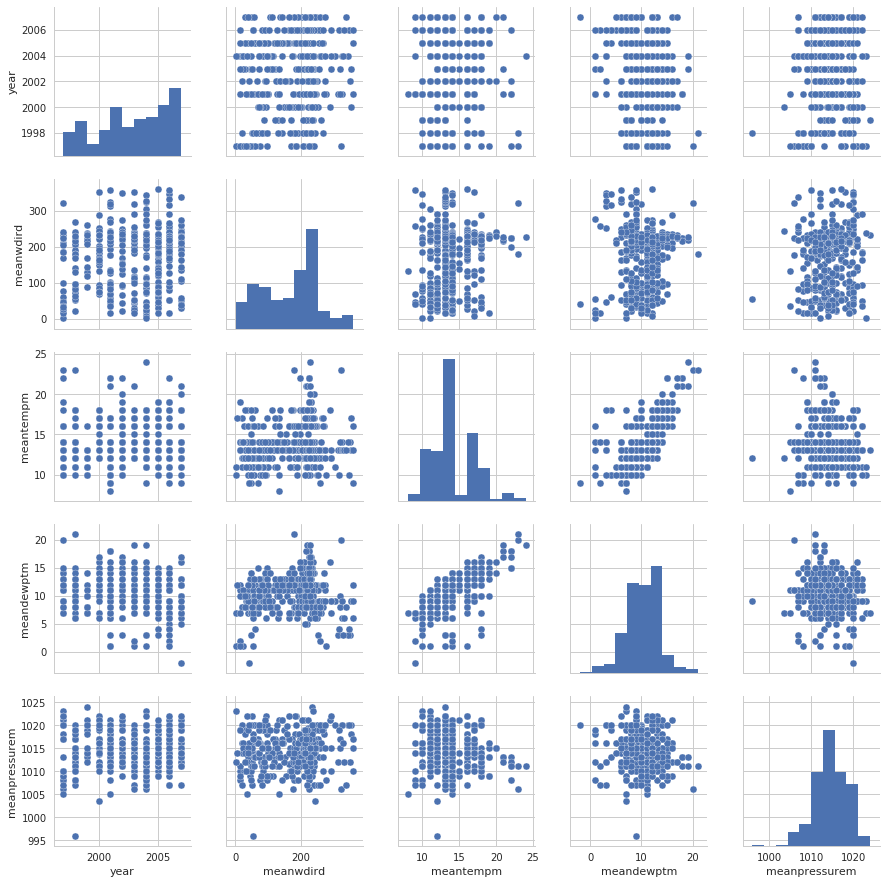

In [13]:
sns.set(style='whitegrid')

sns.pairplot(rain_days_df.dropna())

# eda: heatmaps and time-series

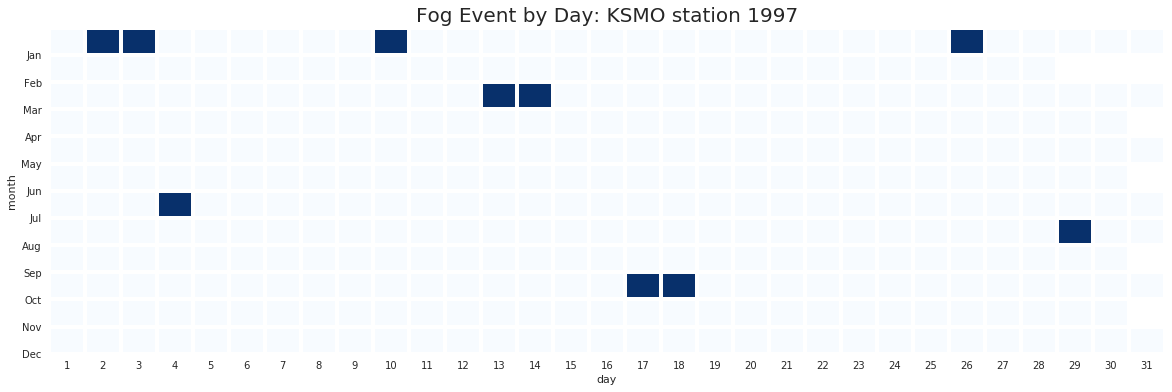

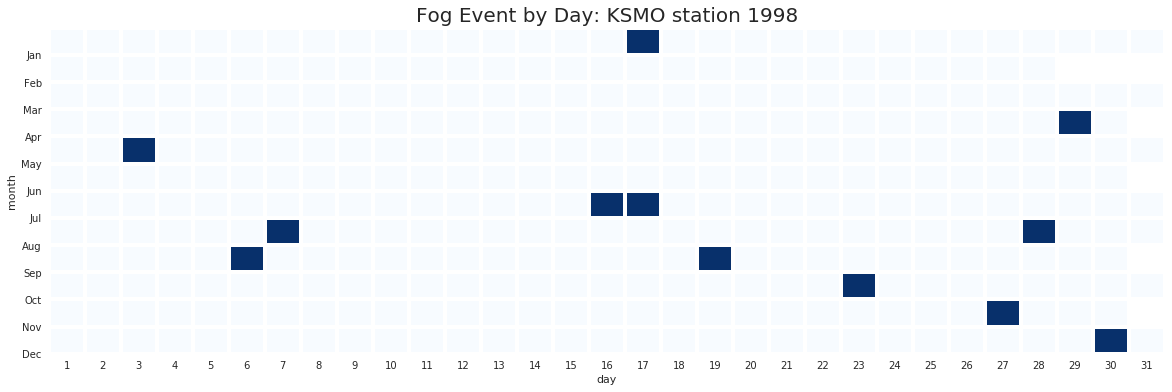

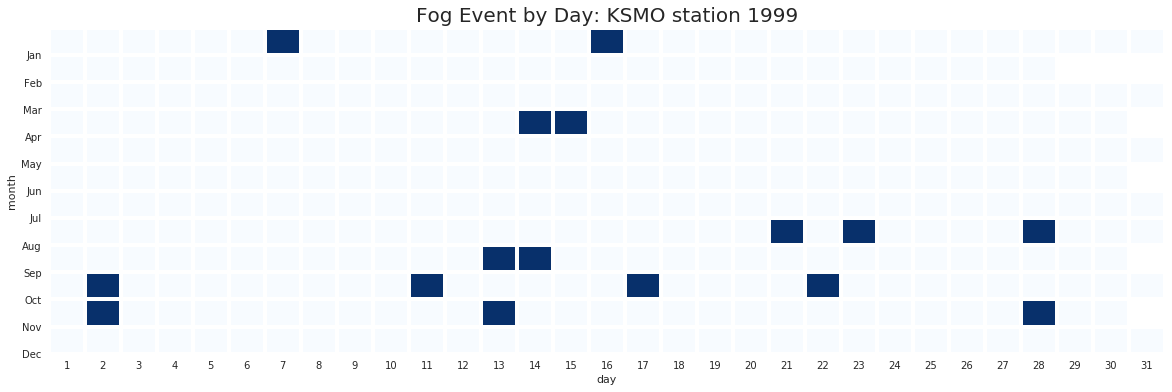

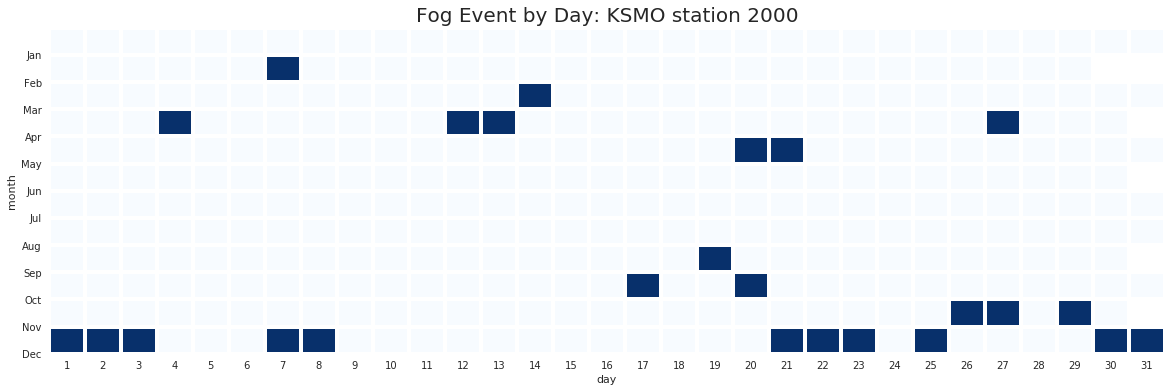

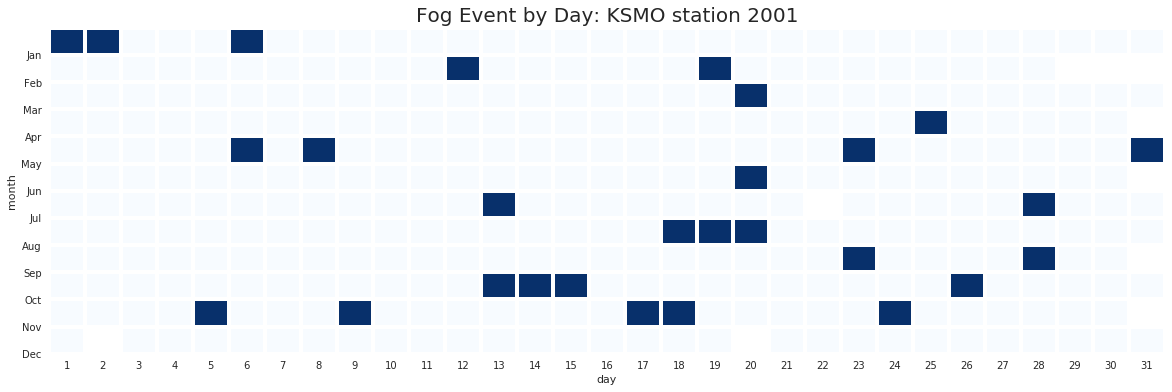

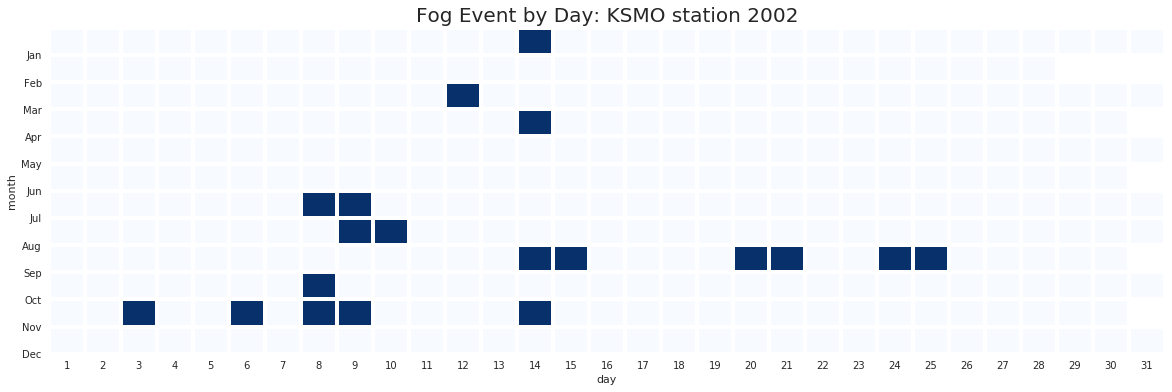

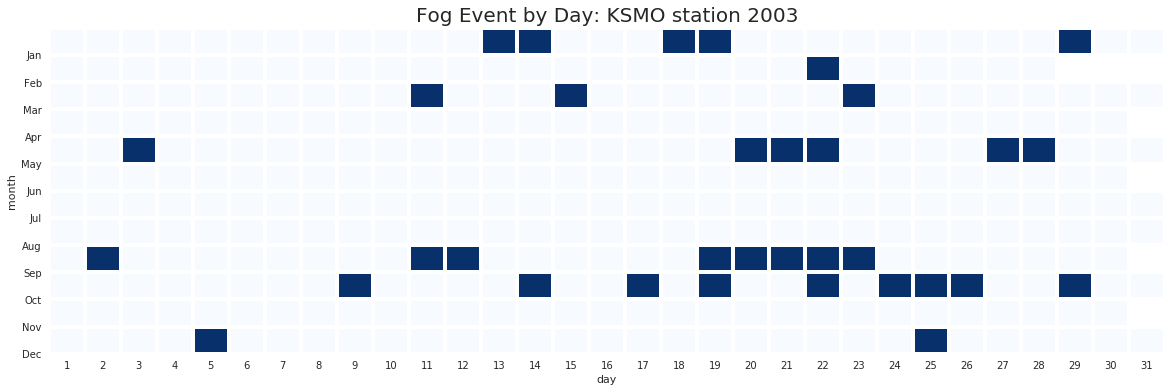

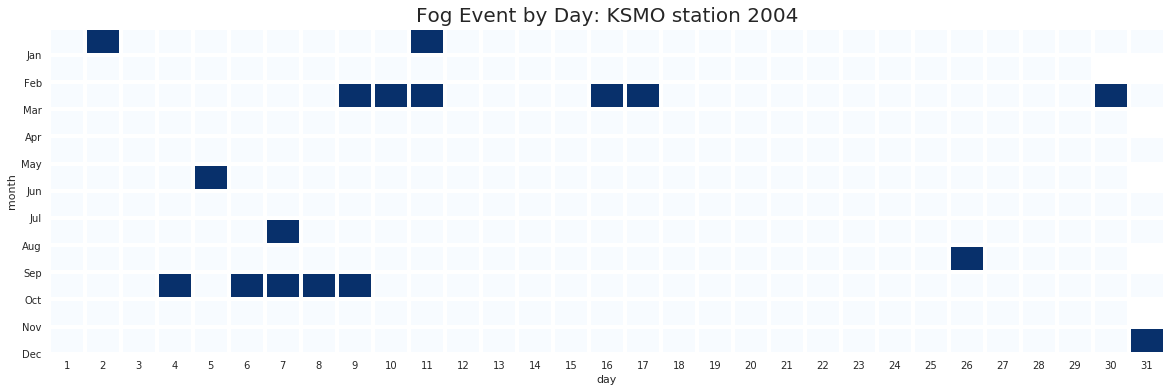

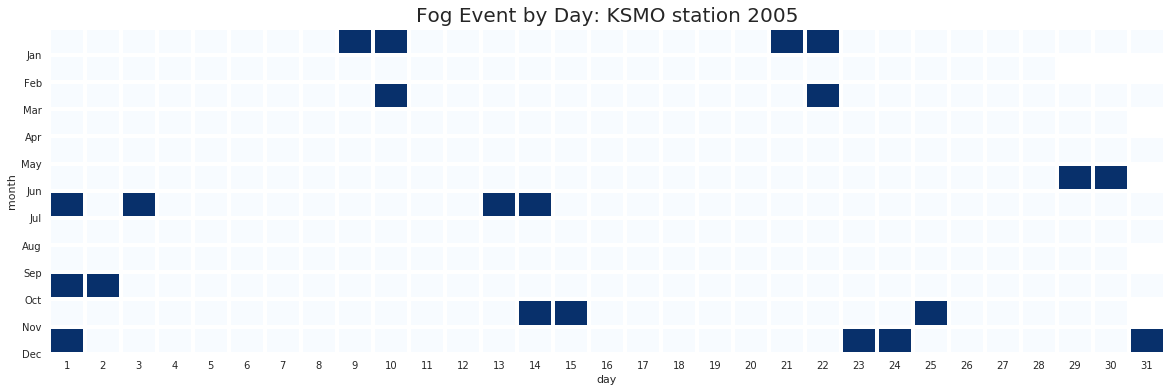

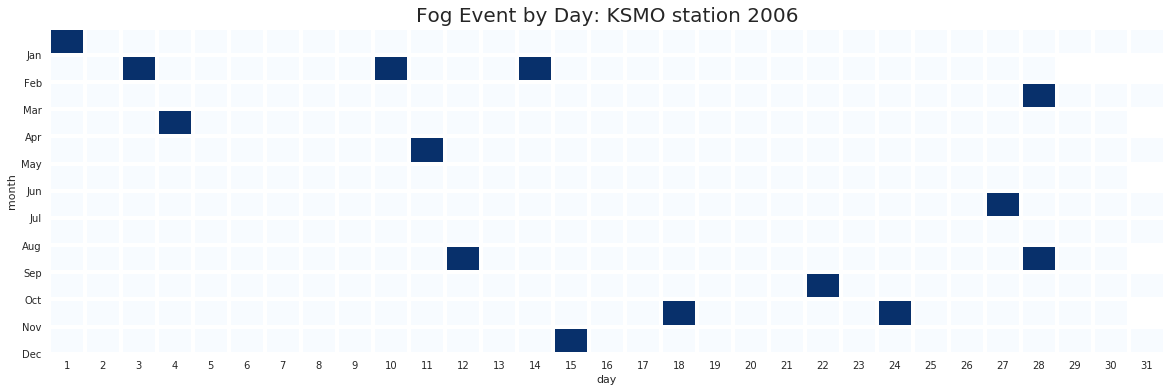

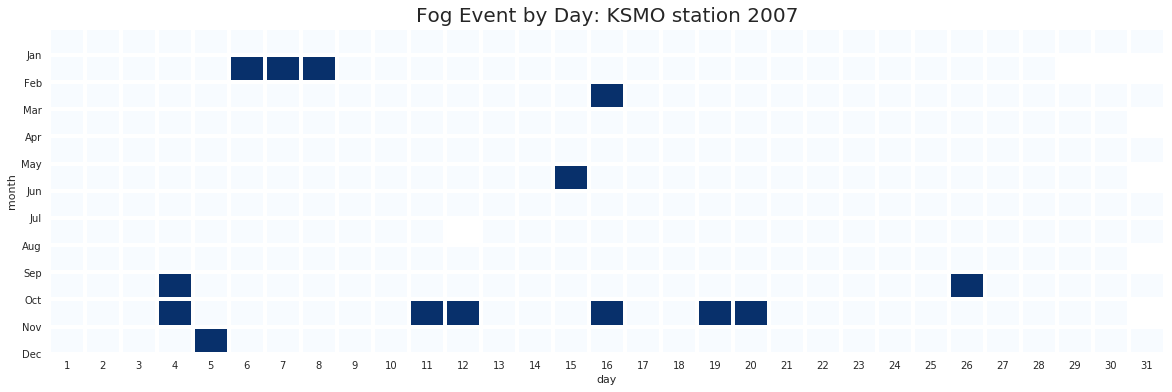

In [14]:
for x in combined_weather_df['year'].unique():
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,6))
    
    sns.heatmap(pt_june_gloom_df.xs(x, level='year', axis=1), linewidth=3, 
                cmap='Blues', cbar=False)
  
    plt.title("Fog Event by Day: KSMO station {}".format(x), fontsize=20)
    plt.yticks(np.arange(1,13,1), month_list, rotation=0)
    plt.show()

In [15]:
#pt_temp_df.xs(x, level='year', axis=1)

AttributeError: 'Figure' object has no attribute 'xmin'

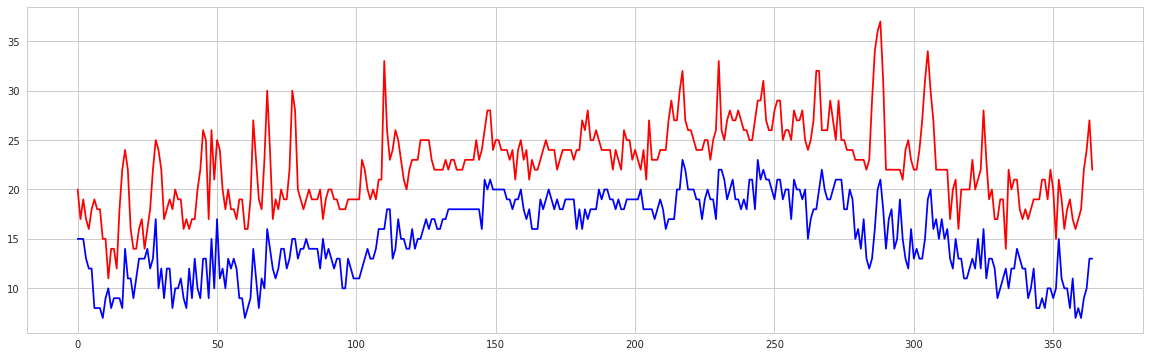

In [16]:
for x in combined_weather_df['year'].unique():
    sns.set(style='whitegrid')
    
    fig, ax = plt.subplots()
    ax.plot(min_max_temp_df[min_max_temp_df['year']==x]['mintempm'].values, 'b')
    ax.plot(min_max_temp_df[min_max_temp_df['year']==x]['maxtempm'].values, 'r')    
    
    fig.set_figheight(6)
    fig.set_figwidth(20)
    
    fig.xmin
    
    plt.title("Min Max Temp {}".format(x), fontsize=20)
    plt.xticks(np.arange(0,365,30.42), month_list)
    plt.yticks(np.arange(0,40,5))

In [ ]:
for x in combined_weather_df['year'].unique():
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,6))
    
    sns.heatmap(pt_temp_df.xs(x, level='year', axis=1), linewidth=3, 
                cmap='coolwarm', cbar=False)
  
    plt.title("Mean Temp Heatmap {}".format(x), fontsize=20)
    plt.yticks(np.arange(1,13,1), month_list, rotation=0)
    plt.show()

# gloomy days by month

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,12))
palette = plt.get_cmap('Set3')

num=0
for year in combined_weather_df['year'].unique():
    num = num+1
    plt.plot(pt_fog_by_month[year].values, color=palette(num), linewidth=3, alpha=0.9, 
             label=year)


plt.legend(loc=2, ncol=1)

plt.title("Fog Events by Month", loc='left', fontsize=20, fontweight=0, color='orange')
plt.xticks(np.arange(0,12), month_list)
plt.xlabel("Month")
plt.ylabel("Number of Fog Day Events")